[{'a': (94, 34), 'b': (22, 67), 'prize': (8400, 5400)}, {'a': (26, 66), 'b': (67, 21), 'prize': (12748, 12176)}, {'a': (17, 86), 'b': (84, 37), 'prize': (7870, 6450)}, {'a': (69, 23), 'b': (27, 71), 'prize': (18641, 10279)}]
3026
2374
(846, 2680)
(9, 40)
(846, 306)
(np.int64(880), np.int64(2680))
a presses: 80
b presses: 40
prize:		 (8400, 5400)
actual prize:	 (8400, 5400)
success


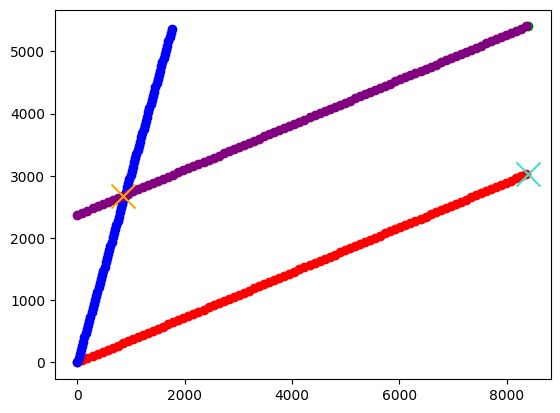

In [116]:
import math
import numpy as np
import matplotlib.pyplot as plt

machines = []

def parse_button_x_y(line):
    x, y = line.split(':')[1].strip().split(',')
    x = int(x.strip().split('+')[1])
    y = int(y.strip().split('+')[1])
    return x, y


def parse_prize_x_y(line):
    x, y = line.split(':')[1].strip().split(',')
    x = int(x.strip().split('=')[1])
    y = int(y.strip().split('=')[1])
    return x, y


with open('example.txt') as f:
    machine = {}
    for i, line in enumerate(f):
        if (i % 4) == 3:
            continue

        if (i % 4) == 0:
            machine['a'] = parse_button_x_y(line)
        elif (i % 4) == 1:
            machine['b'] = parse_button_x_y(line)
        elif (i % 4) == 2:
            machine['prize'] = parse_prize_x_y(line)
            machines.append(machine)
            machine = {}

print(machines)

def visualize(machine):
    a_range = (range(0, machine['prize'][0], machine['a'][0]), range(0, machine['prize'][1], machine['a'][1]))
    b_range = (np.arange(0, machine['prize'][0], machine['b'][0]), np.arange(0, machine['prize'][1], machine['b'][1]))

    zip_a = list(zip(*a_range))
    zip_b = list(zip(*b_range))

    for a in zip_a:
        plt.scatter(a[0], a[1], c='r')

    for b in zip_b:
        plt.scatter(b[0], b[1], c='b')

    plt.scatter(machine['prize'][0], machine['prize'][1], c='g')

    # we can visualize the optimal solution
    # the red line represents the angle of the button a presses
    # the blue line represents the angle of the button b presses
    # the green point represents the prize location
    # the optimal solution is to follow the blue line as high as possible and then the red line until we reach the prize

    # first must raise the red line to the height of the prize
    dy_a_prize = machine['prize'][1] - zip_a[-1][1]
    print(zip_a[-1][1])
    print(dy_a_prize)
    plt.scatter(machine['prize'][0], zip_a[-1][1], c='turquoise', marker='x', s=300)

    for a in zip_a:
        plt.scatter(a[0], a[1]+dy_a_prize, c='purple')

    # then we find the intersection of the red and blue lines
    min_delta = np.inf
    indices = (0, 0)
    for a_n, a in enumerate(zip_a):
        for b_n, b in enumerate(zip_b):
            delta = math.sqrt((a[0] - b[0])**2 + (a[1]+dy_a_prize - b[1])**2)
            if delta < min_delta:
                min_delta = delta
                intersection = (a[0], a[1]+dy_a_prize)
                indices = (a_n, b_n)

    plt.scatter(intersection[0], intersection[1], c='orange', marker='x', s=300)

    print(intersection)
    print(indices)
    print(zip_a[indices[0]])
    print(zip_b[indices[1]])

    a_presses = len(zip_a)-indices[0]-1
    b_presses = len(zip_b)-indices[1]-1

    print(f"a presses: {a_presses}")
    print(f"b presses: {b_presses}")

    p_x = a_presses * machine['a'][0] + b_presses * machine['b'][0]
    p_y = a_presses * machine['a'][1] + b_presses * machine['b'][1]

    print(f"prize:\t\t {(p_x, p_y)}")
    print(f"actual prize:\t {machine['prize']}")

    if (p_x, p_y) == machine['prize']:
        print("success")
    else:
        print("no combination found")

    plt.show()

visualize(machines[0])